In [1]:
!which python

/home/kaushik/anaconda3/envs/dljupyter/bin/python


In [2]:
# Assemble images using https://joedockrill.github.io/jmd_imagescraper/
# !pip install jmd_imagescraper

In [3]:
from jmd_imagescraper.core import *
from pathlib import Path

In [12]:
path = Path('flags')

In [5]:
# https://sceptermarketing.com/comma-separated-lists-of-us-states-abbreviations-select-options-etc/
us_states_territories = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',\
                         'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',\
                         'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',\
                         'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',\
                         'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri',\
                         'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',\
                         'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',\
                         'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',\
                         'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont',\
                         'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [7]:
if not path.exists():
    path.mkdir()
    for some_label in us_states_territories:
        if some_label == 'Minor Outlying Islands':
            pass
        duckduckgo_search(path, some_label, f'{some_label} state or territory flag', max_results=20)

Duckduckgo search: Alabama state or territory flag


Duckduckgo search: Alaska state or territory flag


Duckduckgo search: American Samoa state or territory flag


Duckduckgo search: Arizona state or territory flag


Duckduckgo search: Arkansas state or territory flag


Duckduckgo search: California state or territory flag


Duckduckgo search: Colorado state or territory flag


Duckduckgo search: Connecticut state or territory flag


Duckduckgo search: Delaware state or territory flag


Duckduckgo search: District of Columbia state or territory flag


Duckduckgo search: Florida state or territory flag


Duckduckgo search: Georgia state or territory flag


Duckduckgo search: Guam state or territory flag


Duckduckgo search: Hawaii state or territory flag


Duckduckgo search: Idaho state or territory flag


Duckduckgo search: Illinois state or territory flag


Duckduckgo search: Indiana state or territory flag


Duckduckgo search: Iowa state or territory flag


Duckduckgo search: Kansas state or territory flag


Duckduckgo search: Kentucky state or territory flag


Duckduckgo search: Louisiana state or territory flag


Duckduckgo search: Maine state or territory flag


Duckduckgo search: Maryland state or territory flag


Duckduckgo search: Massachusetts state or territory flag


Duckduckgo search: Michigan state or territory flag


Duckduckgo search: Minnesota state or territory flag
Hit request throttle, sleeping and retrying


Duckduckgo search: Minor Outlying Islands state or territory flag


Duckduckgo search: Mississippi state or territory flag


Duckduckgo search: Missouri state or territory flag


Duckduckgo search: Montana state or territory flag


Duckduckgo search: Nebraska state or territory flag


Duckduckgo search: Nevada state or territory flag


Duckduckgo search: New Hampshire state or territory flag


Duckduckgo search: New Jersey state or territory flag


Duckduckgo search: New Mexico state or territory flag


Duckduckgo search: New York state or territory flag


Duckduckgo search: North Carolina state or territory flag


Duckduckgo search: North Dakota state or territory flag


Duckduckgo search: Northern Mariana Islands state or territory flag


Duckduckgo search: Ohio state or territory flag


Duckduckgo search: Oklahoma state or territory flag


Duckduckgo search: Oregon state or territory flag


Duckduckgo search: Pennsylvania state or territory flag


Duckduckgo search: Puerto Rico state or territory flag


Duckduckgo search: Rhode Island state or territory flag


Duckduckgo search: South Carolina state or territory flag


Duckduckgo search: South Dakota state or territory flag


Duckduckgo search: Tennessee state or territory flag


Duckduckgo search: Texas state or territory flag


Duckduckgo search: U.S. Virgin Islands state or territory flag


Duckduckgo search: Utah state or territory flag
Hit request throttle, sleeping and retrying


Duckduckgo search: Vermont state or territory flag


Duckduckgo search: Virginia state or territory flag


Duckduckgo search: Washington state or territory flag


Duckduckgo search: West Virginia state or territory flag


Duckduckgo search: Wisconsin state or territory flag


Duckduckgo search: Wyoming state or territory flag


In [9]:
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [10]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [13]:
fns = get_image_files(path)
fns

(#1140) [Path('flags/Alabama/001_ba784371.jpg'),Path('flags/Alabama/002_b78923f2.jpg'),Path('flags/Alabama/003_58af716b.jpg'),Path('flags/Alabama/004_5f09c0d3.jpg'),Path('flags/Alabama/005_6a29ffde.jpg'),Path('flags/Alabama/006_65da64cc.jpg'),Path('flags/Alabama/007_4bd20bd1.jpg'),Path('flags/Alabama/008_f2756f95.jpg'),Path('flags/Alabama/009_e6a77ad3.jpg'),Path('flags/Alabama/010_a14d40fd.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#0) []

In [15]:
flags = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = flags.dataloaders(path)

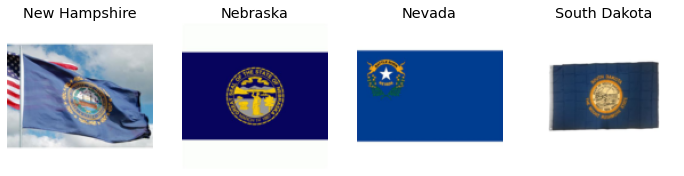

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

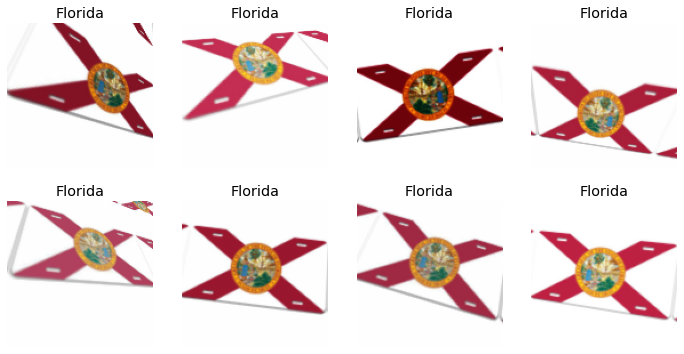

In [18]:
# Data Augmentation
flags = flags.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = flags.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
flags = flags.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = flags.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.039522,2.567841,0.657895,00:05


epoch,train_loss,valid_loss,error_rate,time
0,2.417234,1.676621,0.425439,00:06
1,1.690600,0.998947,0.258772,00:06
2,1.200828,0.842578,0.228070,00:06
3,0.917309,0.848977,0.219298,00:06


In [22]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

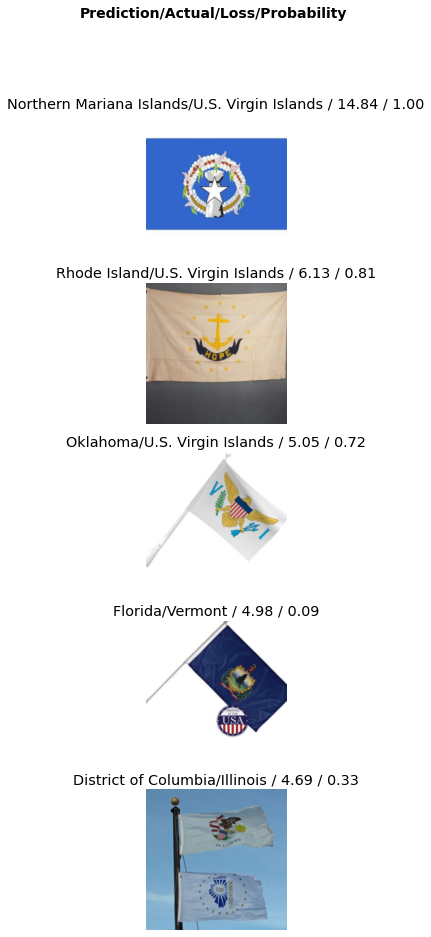

In [38]:
interp.plot_top_losses(5, nrows=5)

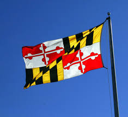

In [25]:
im = Image.open('./maryland_test_1.jpg')
im.to_thumb(128,128)

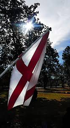

In [36]:
im = Image.open('./alabama_test_1.jpg')
im.to_thumb(128,128)

In [26]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [34]:
pred,pred_idx,probs = learn_inf.predict('./maryland_test_1.jpg')

In [35]:
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: Maryland; Probability: 0.9873'

In [37]:
pred,pred_idx,probs = learn_inf.predict('./alabama_test_1.jpg')
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: Alabama; Probability: 0.8544'

In [29]:
learn_inf.dls.vocab

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [40]:
doc(load_learner)